In [1]:
import PIL
import glob
import tensorflow as tf
import numpy as np
import datetime, os
import matplotlib.pyplot as plt
#from tensorflow.keras.layers import *
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output
print(tf.__version__)


2.5.0


In [2]:
model = tf.keras.models.load_model('UNet_Model_3_ICA.h5')

In [3]:
def create_mask(pred_mask: tf.Tensor) -> tf.Tensor:
    """Return a filter mask with the top 1 predictions
    only.

    Parameters
    ----------
    pred_mask : tf.Tensor
        A [IMG_SIZE, IMG_SIZE, N_CLASS] tensor. For each pixel we have
        N_CLASS values (vector) which represents the probability of the pixel
        being these classes. Example: A pixel with the vector [0.0, 0.0, 1.0]
        has been predicted class 2 with a probability of 100%.

    Returns
    -------
    tf.Tensor
        A [IMG_SIZE, IMG_SIZE, 1] mask with top 1 predictions
        for each pixels.
    """
    # pred_mask -> [IMG_SIZE, SIZE, N_CLASS]
    # 1 prediction for each class but we want the highest score only
    # so we use argmax
    pred_mask = tf.argmax(pred_mask, axis=-1)
    # pred_mask becomes [IMG_SIZE, IMG_SIZE]
    # but matplotlib needs [IMG_SIZE, IMG_SIZE, 1]
    pred_mask = tf.expand_dims(pred_mask, axis=-1)
    return pred_mask


In [4]:
def normalize(input_image: tf.Tensor) -> tuple:
    """Rescale the pixel values of the images between 0.0 and 1.0
    compared to [0,255] originally.

    Parameters
    ----------
    input_image : tf.Tensor
        Tensorflow tensor containing an image of size [SIZE,SIZE,3].
    input_mask : tf.Tensor
        Tensorflow tensor containing an annotation of size [SIZE,SIZE,1].

    Returns
    -------
    tuple
        Normalized image and its annotation.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    #input_mask = tf.cast(input_mask, tf.float32) / 255.0
    return input_image

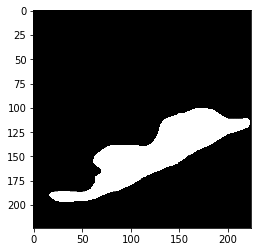

In [10]:
outPath = r'G:\(11)-AI-in-MEDICINE-Journal\(1)-UNet\(1)-ICA\Prediction-3'
path = r'G:\(11)-AI-in-MEDICINE-Journal\(0)-Database\(0)-ICA\Training-Data\val-3'

    # iterate through the names of contents of the folder
for image_path in os.listdir(path):

     # create the full input path and read the file
    input_path = os.path.join(path, image_path)
    sample_image = plt.imread(input_path)
    sample_image = normalize(sample_image)
    # Predict the image
    sample_image2 = tf.expand_dims(sample_image, axis=0)
    # create full output path, 'example.jpg' 
     # becomes 'rotate_example.jpg', save the file to disk
    fullpath = os.path.join(outPath, 'Pred_'+image_path)
    prediction_inference = model.predict(sample_image2)
    pred_mask = create_mask(prediction_inference)
    pred_img = tf.keras.preprocessing.image.array_to_img(pred_mask[0])
    plt.imshow(pred_img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.imsave(fullpath,pred_img,cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

In [8]:
print(max(pred_mask))

tf.Tensor(
[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]], shape=(224, 224, 1), dtype=int64)
